This notebook will be used to test the script defined in this folder.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imp

## Testing of the potential profile script

In [ ]:
import potential_profile
N_grid = 100
x = np.linspace(-100,100,N_grid,endpoint=True)

# trial potential profile
param1 = [150e-3,-50,50,5,50]
param2 = [-200e-3,-25,50,5,50]
param3 = [250e-3,0,50,5,50]
param4 = [-200e-3,25,50,5,50]
param5 = [150e-3,50,50,5,50]
trial_gates = [param1,param2,param3,param4,param5] 

V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

## Testing of the ThomasFermi class

In [ ]:
import potential_profile
import thomas_fermi
imp.reload(thomas_fermi)

x = np.linspace(-200,200,100)

# trial potential profile
param1 = [200e-3,-150,50,5,50]
param2 = [-140e-3,-50,50,5,50]
param3 = [250e-3,0,50,5,50]
param4 = [-140e-3,50,50,5,50]
param5 = [200e-3,150,50,5,50]
trial_gates = [param1,param2,param3,param4,param5] 

plt.figure(1)
V = potential_profile.calc_V(x,trial_gates)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("V(x) for a set of trial gates");

physics = {'x' : x,
           'V' : V,
           'K_0' : 5e-3, 
           'sigma' : 10.0,
           'mu' : 0.1,
           'D' : 2,
           'g_0' : 1e-1,
           'c_k' : 0e-4,
           'beta' : 100,
           'kT' : 1e-5,
           'WKB_coeff' : 1,
           'barrier_tunnel_rate' : 1.0,
           'bias' : 1e-5,
           'ShortCircuitCurrent' : 1.0,
           'attempt_rate_coef' : 1
           }

tf = thomas_fermi.ThomasFermi(physics)
n = tf.calc_n()
islands = tf.calc_islands()
barriers = tf.calc_barriers()
p_WKB = tf.calc_WKB_prob()
charges = tf.calc_charges()
cap_model = tf.calc_cap_model()
stable_config = tf.calc_stable_config()
current = tf.calc_current()
graph_charge = tf.calc_graph_charge()

print("islands",islands)
print("barriers",barriers)
print("WKB Probability",p_WKB)
print("charges",charges)
print("cap_model",cap_model)
print("stable_config",stable_config)
print("current",current)
print("graph charge",graph_charge)

plt.figure(2)
plt.plot(x,n)
plt.xlabel('x')
plt.ylabel('n(x)')
plt.title("n(x) for a set of trial gates");

## Double dot 2D Map script

In [ ]:
import double_dot
imp.reload(double_dot)

double_dot.calc_2D_map()

In [ ]:
## Double dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.load_balanced_view()
lview.block = True

@lview.parallel()
def f(n):
    import double_dot
    double_dot.calc_2D_map()

f.map(range(4))

# Testing of Random Single Dot script

In [ ]:
import random_single_dot
imp.reload(random_single_dot)

V_gate,I,charge = random_single_dot.calc_1D_trace(256)
plt.figure(1)
plt.plot(V_gate,I)
plt.figure(2)
plt.plot(V_gate,charge)

In [ ]:
## single dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.direct_view()
lview.block = True

@lview.parallel()
def f(n):
    import sys
    sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model')
    import random_single_dot
    random_single_dot.calc_1D_trace(256)

f.map(range(1024))

## Single Dot Barrier map

In [32]:
import random_single_dot
imp.reload(random_single_dot)

N_v = 100
res = random_single_dot.calc_barrier_map(N_v)

Physics
 {'mu': 0.1, 'K_0': 0.009160371170119516, 'barrier_tunnel_rate': 10.0, 'WKB_coeff': 1, 'ShortCircuitCurrent': 0.0, 'g_0': 0.05, 'kT': 1e-05, 'beta': 50, 'sigma': 1, 'c_k': 0.001, 'mu_R': -5e-05, 'V': array([ 0.17280601,  0.17874882,  0.1847134 ,  0.19069145,  0.19667429,
        0.20265282,  0.20861763,  0.21455898,  0.22046692,  0.22633128,
        0.23214178,  0.23788807,  0.24355985,  0.24914688,  0.25463912,
        0.2600268 ,  0.26530048,  0.27045118,  0.27547042,  0.28035031,
        0.28508362,  0.28496742,  0.28212833,  0.2791542 ,  0.27605821,
        0.27285417,  0.26955647,  0.26617994,  0.26273981,  0.25925158,
        0.25573094,  0.25219367,  0.24865552,  0.24513211,  0.24163886,
        0.23819086,  0.23480276,  0.23148871,  0.22826227,  0.22513626,
        0.22212275,  0.21923296,  0.21647714,  0.21386457,  0.21140345,
        0.20910086,  0.2069627 ,  0.20499368,  0.20319724,  0.20157556,
        0.20194755,  0.20430847,  0.20682999,  0.20950059,  0.21230765,


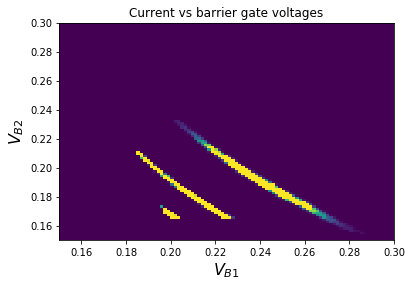

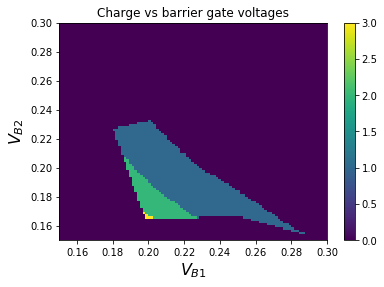

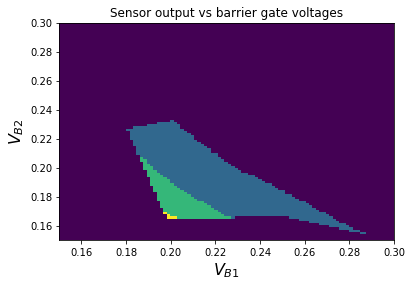

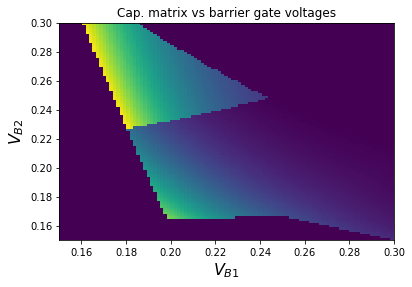

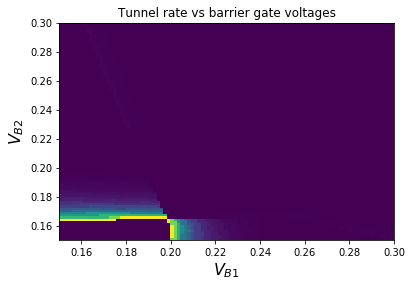

In [33]:
V_B1= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
V_B2= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
XX,YY = np.meshgrid(V_B1,V_B2)

plt.figure(1)
plt.pcolor(XX,YY,np.array(res['current']).reshape(N_v,N_v),vmax=1e-6)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,np.array(res['charge']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,np.array(res['sensor']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Sensor output vs barrier gate voltages")
plt.figure(4)
plt.pcolor(XX,YY,np.array([np.sum(y[0]) for y in res['cap_model']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Cap. matrix vs barrier gate voltages")
plt.figure(5)
plt.pcolor(XX,YY,np.array([y[0] for y in res['tunnel_vec']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Tunnel rate vs barrier gate voltages")

In [34]:
## double dot parallelism
import ipyparallel as ipp
rc = ipp.Client()
lview = rc.direct_view()
lview.block = True

@lview.parallel()
def f(n):
    import sys
    sys.path.append('/Users/sandesh/repos/quantum-ml/Nanowire Model')
    import random_single_dot
    random_single_dot.calc_barrier_map(100)

f.map(range(100))

/usr/local/lib/python3.5/site-packages/ipyparallel/client/client.py:442: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@192.168.1.133')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


<AsyncMapResult: f>

In [43]:
import glob
files = glob.glob("/Users/sandesh/data/single_dot/20171105-2336*")
print(len(files))
res = np.load(files[0]).item()
V_B1= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
V_B2= np.array(res['V_gate']).reshape(N_v,N_v,2)[0,:,1]
XX,YY = np.meshgrid(V_B1,V_B2)

plt.figure(1)
plt.pcolor(XX,YY,np.array(res['current']).reshape(N_v,N_v),vmax=1e-6)
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Current vs barrier gate voltages")
plt.figure(2)
plt.pcolor(XX,YY,np.array(res['charge']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Charge vs barrier gate voltages")
cbar = plt.colorbar()
plt.figure(3)
plt.pcolor(XX,YY,np.array(res['sensor']).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Sensor output vs barrier gate voltages")
plt.figure(4)
plt.pcolor(XX,YY,np.array([np.sum(y[0]) for y in res['cap_model']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Cap. matrix vs barrier gate voltages")
plt.figure(5)
plt.pcolor(XX,YY,np.array([y[0] for y in res['tunnel_vec']]).reshape(N_v,N_v))
plt.xlabel(r"$V_{B1}$",fontsize=16)
plt.ylabel(r"$V_{B2}$",fontsize=16)
plt.title("Tunnel rate vs barrier gate voltages")

4


KeyError: 'current'

In [37]:
res

{'I': array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.78785085e-27,   1.58636672e-27,   1.40830945e-27]),
 'V_gate': [(0.14999999999999999, 0.14999999999999999),
  (0.14999999999999999, 0.15151515151515152),
  (0.14999999999999999, 0.15303030303030302),
  (0.14999999999999999, 0.15454545454545454),
  (0.14999999999999999, 0.15606060606060607),
  (0.14999999999999999, 0.15757575757575756),
  (0.14999999999999999, 0.15909090909090909),
  (0.14999999999999999, 0.16060606060606061),
  (0.14999999999999999, 0.16212121212121211),
  (0.14999999999999999, 0.16363636363636364),
  (0.14999999999999999, 0.16515151515151516),
  (0.14999999999999999, 0.16666666666666666),
  (0.14999999999999999, 0.16818181818181818),
  (0.14999999999999999, 0.16969696969696968),
  (0.14999999999999999, 0.1712121212121212),
  (0.14999999999999999, 0.17272727272727273),
  (0.14999999999999999, 0.17424242424242423),
  (0.14999999999999999, 0.17575757575757575),
  (0.14999999999999999, 0.1